<a href="https://colab.research.google.com/github/ShivangKeshri/Machine-Learning-Projects/blob/main/House_Price_Prediction_using_ML_and_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # numpy arrays
import pandas as pd # helpful for dataframes
import matplotlib.pyplot as plt # helpful for plotting data
import seaborn as sns
import sklearn.datasets # ml algorithsm, functions, datasets, etc...
from sklearn.model_selection import train_test_split # sklearn has inbuilt train-test splitter
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
house_price_df = pd.read_csv('Housing.csv')
house_price_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# checking for the number of rows and coloumns in the dataset
house_price_df.shape

(545, 13)

In [ ]:
# checking for missing values
house_price_df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# statistical measures of this data
house_price_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#postive correlation - positive proportional relationship
 # negative correlation - negative proportional relationship
house_price_numeric = pd.get_dummies(house_price_df, drop_first=True)
correlation = house_price_numeric.corr()

In [ ]:
# constructing a heatmap to see correlation
plt.figure(figsize = (15,15))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'fontsize':8}, cmap = 'Blues')

NameError: name 'sns' is not defined

In [ ]:
 # splitting the data and the target variable
x = house_price_df.drop(['price'], axis = 1)
y = house_price_df['price'] # y is the new variable that has the price coloumn instead of the original dataset


In [ ]:
print(x)
print(y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [ ]:
# splitting the data into test and train datasets(Cross-validation on other projects)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
# 0.2 = 20% of the total data is test data
# 0.8 = 80% is the remaining train data

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(545, 12) (436, 13) (109, 12)


In [ ]:
# Find the minimum number of rows between x_train and y_train
min_rows = min(len(x_train), len(y_train))

# Truncate x_train and y_train to the same number of rows
x_train = x_train[:min_rows]
y_train = y_train[:min_rows]

In [ ]:

# removing the categorical datasets due to strings in the dataset
x_train = pd.get_dummies(x_train, drop_first=True)
y_train = pd.get_dummies(y_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
y_test = pd.get_dummies(y_test, drop_first=True)

In [ ]:
# Model Training
model = XGBRegressor()


In [ ]:
# Fitting the regressor model onto
model.fit(x_train, x_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluation on Training Data after model has been fitted :
# accuracy for the prediction on training data
training_data_prediction  = model.predict(x_train)
print(training_data_prediction)

[[2.6101965e+03 3.0000014e+00 1.0000532e+00 ... 9.9988335e-01
  6.4890592e-05 9.9986905e-01]
 [7.7701982e+03 2.0001354e+00 1.0000532e+00 ... 4.6359441e-05
  6.4890592e-05 6.7294517e-05]
 [3.1850005e+03 2.0001354e+00 1.0000532e+00 ... 4.6359441e-05
  6.4890592e-05 9.9986905e-01]
 ...
 [1.0499941e+04 3.9998548e+00 1.9998797e+00 ... 4.6359441e-05
  9.9990040e-01 6.7294517e-05]
 [2.7001118e+03 2.0001354e+00 1.0000532e+00 ... 4.6359441e-05
  6.4890592e-05 6.7294517e-05]
 [3.8502175e+03 3.0000014e+00 1.0000532e+00 ... 4.6359441e-05
  6.4890592e-05 9.9986905e-01]]


In [ ]:
print(training_data_prediction)

[[2.6101965e+03 3.0000014e+00 1.0000532e+00 ... 9.9988335e-01
  6.4890592e-05 9.9986905e-01]
 [7.7701982e+03 2.0001354e+00 1.0000532e+00 ... 4.6359441e-05
  6.4890592e-05 6.7294517e-05]
 [3.1850005e+03 2.0001354e+00 1.0000532e+00 ... 4.6359441e-05
  6.4890592e-05 9.9986905e-01]
 ...
 [1.0499941e+04 3.9998548e+00 1.9998797e+00 ... 4.6359441e-05
  9.9990040e-01 6.7294517e-05]
 [2.7001118e+03 2.0001354e+00 1.0000532e+00 ... 4.6359441e-05
  6.4890592e-05 6.7294517e-05]
 [3.8502175e+03 3.0000014e+00 1.0000532e+00 ... 4.6359441e-05
  6.4890592e-05 9.9986905e-01]]


In [ ]:
# R squared error metrics for the y_train which is the price coloumn
score_1 = metrics.r2_score(y_train, training_data_prediction)
# r2 square value finds variance between y_train and training_data_prediction
# Mean absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print(f"R-Squared Error : {score_1}")
print(f"Mean Absolute error : {score_2}")

R-Squared Error : 1.0
Mean Absolute error : 0.006444211724776378


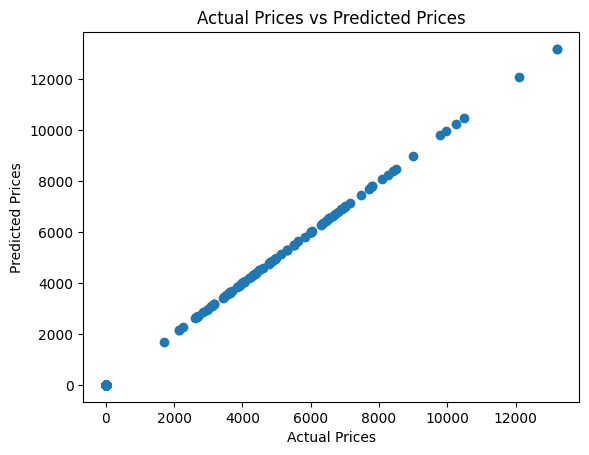

In [ ]:
# visualizing the actual prices over predicted prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# Now make predictions

x_test = pd.get_dummies(x_test, drop_first=True)
y_test = pd.get_dummies(y_test, drop_first=True)

In [ ]:
# prediction on test data
test_data_prediction = model.predict(x_test)

In [ ]:
# R squared error metrics for the y_train which is the price coloumn
score_3 = metrics.r2_score(y_test, test_data_prediction)
# r2 square value finds variance between y_train and training_data_prediction
# Mean absolute error
score_4 = metrics.mean_absolute_error(y_test, test_data_prediction)
print(f"R-Squared Error : {score_3}")
print(f"Mean Absolute error : {score_4}")

# model is performing good!

R-Squared Error : 1.0
Mean Absolute error : 0.006444211724776378


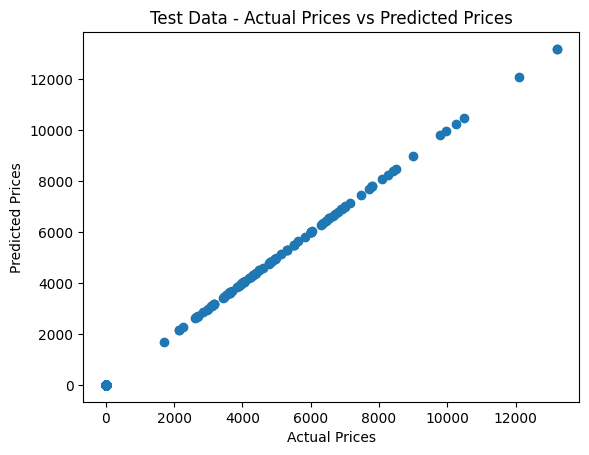

In [ ]:
plt.scatter(x_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Data - Actual Prices vs Predicted Prices")
plt.show()